In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("football.csv", delimiter = ";")

In [38]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30 00:00:00,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08 00:00:00,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07 00:00:00,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06 00:00:00,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04 00:00:00,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

How many tuples are there in the dataset?

In [5]:
df.shape[0]

42650

How many tournaments are there in the dataset?

In [6]:
len(df["tournament"].unique())

120

In [7]:
type(df.loc[0, "date"])

str

In [8]:
for i in df.index:
    df.loc[i, "date"]  = pd.Timestamp(df.loc[i, "date"])

Find out how many matches in the dataset were played in 2018.

In [9]:
cont = 0
for i in df.index:
    if df.loc[i,"date"].year == 2018:
        cont += 1
print(cont)

908


Calculate how many times the home team won, lost, or had a draw.

In [10]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30 00:00:00,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08 00:00:00,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07 00:00:00,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06 00:00:00,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04 00:00:00,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
homeTeam = {
    "won":0,
    "lost":0,
    "draw":0,
 
}

In [12]:
for i in df.index:
    home = df.loc[i, "home_score"]
    away = df.loc[i, "away_score"]
    if home == away:
        homeTeam["draw"] = homeTeam["draw"] + 1
    elif home > away:
        homeTeam["won"] = homeTeam["won"] + 1
    elif home < away:
        homeTeam["lost"] = homeTeam["lost"] + 1
    else:
        homeTeam["error"] = homeTeam["error"] + 1

In [13]:
home_team = pd.DataFrame(homeTeam.values(), homeTeam.keys(), columns = ["Total"])
home_team

,Total
won,20739
lost,12074
draw,9837


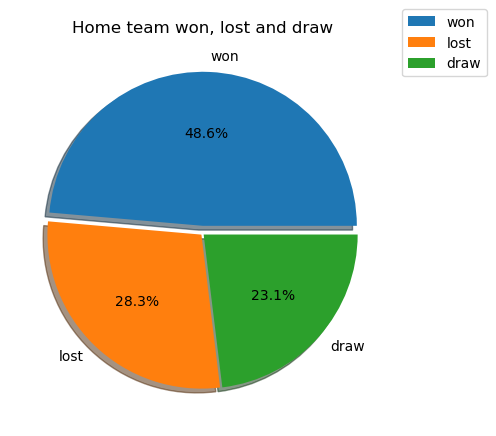

In [29]:
plt.figure(figsize =(18,5))
plt.title("Home team won, lost and draw")
plt.pie(home_team["Total"], 
        explode = [0.05,0.01,0.01],
        labels = home_team.index,
        shadow = True,
        autopct='%1.1f%%')
plt.legend(loc = "upper left",labels = home_team.index,bbox_to_anchor=(1, 1.1))

In [15]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30 00:00:00,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08 00:00:00,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07 00:00:00,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06 00:00:00,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04 00:00:00,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [24]:
neutral = df["neutral"].value_counts()
neutral

neutral
False    32076
True     10574
Name: count, dtype: int64

Text(0.5, 1.0, 'Neutral column')

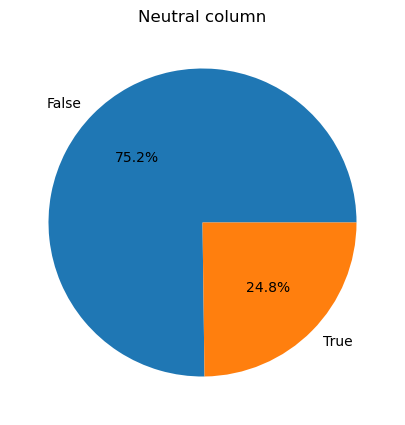

In [30]:
plt.figure(figsize =(18,5))
plt.pie(neutral, 
        labels = neutral.index,
       autopct='%1.1f%%')
plt.title("Neutral column")
#plt.legend(loc = "upper left",labels = home_team.index,bbox_to_anchor=(0, 1.1))

In [36]:
home = df["home_team"].unique()
print(len(home))
away = df["away_team"].unique()
print(len(away))

308
306


We can have the same team name in home and away for different dates. Therefore, well use an auxiliary list to get all the teams names and the get only the unique.

In [37]:
teams = []

for i in home:
    teams.append(i)
for j in away:
    teams.append(j)
    
teams = list(set(teams))
print("Unique teams:",len(teams))

Unique teams: 313
